In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the Titanic dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Display the first few rows and basic info to understand the data
print("First 5 Rows:")
display(df.head())

print("\nDataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

First 5 Rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Emb

In [8]:
# Preprocessing steps
# Identify categorical and numerical features
categorical_features = ['Sex', 'Embarked']
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass'] # Include Pclass as it can be treated as numerical for scaling

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Impute missing numerical values with the median
    ('scaler', StandardScaler()) # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Impute missing categorical values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # Apply one-hot encoding to categorical features
])

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop' # Drop columns not specified in transformers
)

# Define features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data successfully preprocessed and split into training and testing sets.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data successfully preprocessed and split into training and testing sets.
Shape of X_train: (712, 11)
Shape of X_test: (179, 11)
Shape of y_train: (712,)
Shape of y_test: (179,)


In [4]:
from sklearn.impute import SimpleImputer

In [5]:
# Preprocessing steps
# Identify categorical and numerical features
categorical_features = ['Sex', 'Embarked']
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass'] # Include Pclass as it can be treated as numerical for scaling

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Impute missing numerical values with the median
    ('scaler', StandardScaler()) # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Impute missing categorical values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # Apply one-hot encoding to categorical features
])

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop' # Drop columns not specified in transformers
)

# Define features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data successfully preprocessed and split into training and testing sets.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data successfully preprocessed and split into training and testing sets.
Shape of X_train: (712, 11)
Shape of X_test: (179, 11)
Shape of y_train: (712,)
Shape of y_test: (179,)


In [6]:
# Select and train a base model (Logistic Regression)
# Create a pipeline that includes the preprocessor and the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(solver='liblinear', random_state=42))])

# Train the model
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


In [7]:
# Step 2: Cross-Validation

# Implement K-Fold Cross-Validation
# Use the entire dataset X and y for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
kfold_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

print("K-Fold Cross-Validation Scores:", kfold_scores)
print("Mean K-Fold Accuracy:", np.mean(kfold_scores))
print("Standard Deviation of K-Fold Accuracy:", np.std(kfold_scores))

# Implement Stratified K-Fold Cross-Validation (suitable for classification)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
stratified_kfold_scores = cross_val_score(model, X, y, cv=stratified_kfold, scoring='accuracy')

print("\nStratified K-Fold Cross-Validation Scores:", stratified_kfold_scores)
print("Mean Stratified K-Fold Accuracy:", np.mean(stratified_kfold_scores))
print("Standard Deviation of Stratified K-Fold Accuracy:", np.std(stratified_kfold_scores))

print("\nCross-validation performed successfully.")

K-Fold Cross-Validation Scores: [0.81005587 0.79775281 0.84269663 0.7752809  0.78089888]
Mean K-Fold Accuracy: 0.8013370158809867
Standard Deviation of K-Fold Accuracy: 0.024067078255205286

Stratified K-Fold Cross-Validation Scores: [0.77094972 0.80337079 0.79213483 0.78089888 0.82022472]
Mean Stratified K-Fold Accuracy: 0.7935157868307073
Standard Deviation of Stratified K-Fold Accuracy: 0.017209351470805104

Cross-validation performed successfully.


In [9]:
# Step 3: Hyperparameter Tuning with GridSearch

# Define the parameter grid for Logistic Regression
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'classifier__penalty': ['l1', 'l2'], # Penalty type
    'classifier__solver': ['liblinear'] # Solver that supports both l1 and l2 penalties
}

# Set up GridSearchCV
# Use the 'model' pipeline which includes preprocessing and the classifier
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy', refit=True)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Display the best parameters and the best score
print("Best hyperparameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

print("\nHyperparameter tuning with GridSearch completed successfully.")

Best hyperparameters found: {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best cross-validation accuracy: 0.796395154141633

Hyperparameter tuning with GridSearch completed successfully.


Feature Importance based on Logistic Regression Coefficients:


,Feature,Coefficient,Abs_Coefficient
6,Sex_male,-1.305030,1.305030
5,Sex_female,0.888557,0.888557
4,Pclass,-0.764313,0.764313
0,Age,-0.321326,0.321326
1,SibSp,-0.119051,0.119051
9,Embarked_S,-0.113935,0.113935
3,Fare,0.036883,0.036883
2,Parch,0.000000,0.000000
7,Embarked_C,0.000000,0.000000
8,Embarked_Q,0.000000,0.000000


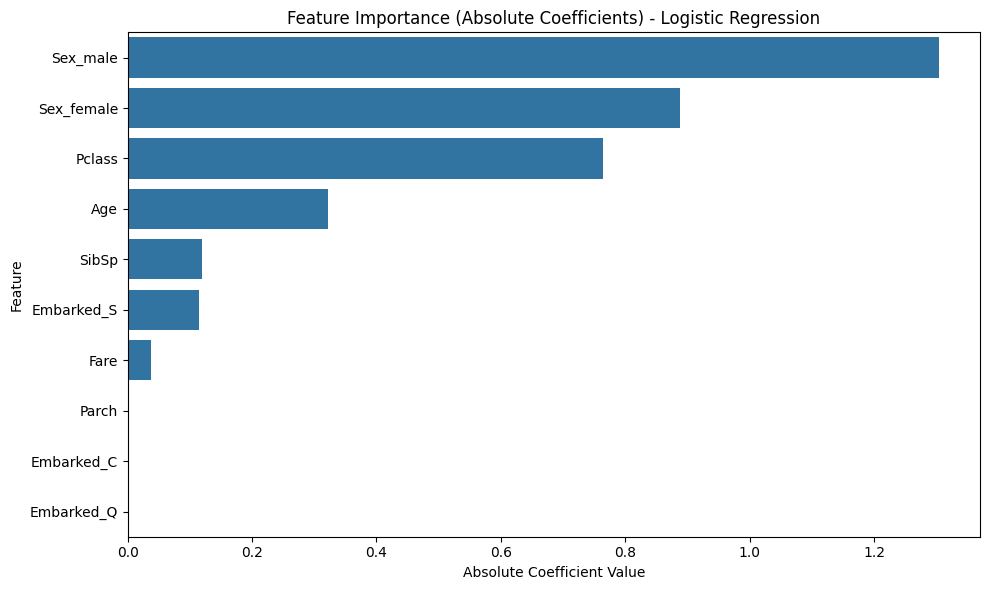

In [10]:
# Step 4: Feature Selection and Importance

# Get the trained Logistic Regression model from the pipeline
logistic_model = best_model.named_steps['classifier']

# Get the feature names after preprocessing
# This requires transforming a dummy input to get the feature names from the one-hot encoder
# We will create a small dummy dataframe with the same columns as the original X
dummy_X = X.head(1)
transformed_dummy_X = best_model.named_steps['preprocessor'].transform(dummy_X)

# Get feature names from the one-hot encoder
onehot_features = best_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)

# Combine numerical and one-hot encoded feature names
all_features = list(numerical_features) + list(onehot_features)

# Get the coefficients from the logistic regression model
coefficients = logistic_model.coef_[0]

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': all_features, 'Coefficient': coefficients})

# Calculate absolute coefficients for ranking
feature_importance_df['Abs_Coefficient'] = abs(feature_importance_df['Coefficient'])

# Sort features by absolute coefficient in descending order
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

print("Feature Importance based on Logistic Regression Coefficients:")
display(feature_importance_df)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=feature_importance_df)
plt.title('Feature Importance (Absolute Coefficients) - Logistic Regression')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [11]:
# Step 5: Final Evaluation

# Predict on the test set using the best model found by GridSearch
y_pred = best_model.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Performance on the Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Optionally, compare with the baseline model's performance on the test set
# This requires predicting with the baseline model (model) on the test set
# For a direct comparison, you would need to evaluate the baseline model on X_test as well
# y_pred_baseline = model.predict(X_test)
# accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
# print(f"\nBaseline Model Accuracy on Test Set: {accuracy_baseline:.4f}")

print("\nFinal evaluation completed.")

Model Performance on the Test Set:
Accuracy: 0.7989
Precision: 0.7895
Recall: 0.6522
F1-Score: 0.7143

Final evaluation completed.
